# Probelm Statement
#### Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset.

# Dataset Attributes:
1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. City - The city in which the restraunt is placed
5. Category - specific type of category provided by restaurant
6. No_of_item - Different types of items provided by restaurant
7. Order_Placed - Order placed by customer to restaurant (in lacs)
8. Revenue - Total amount of income generated by the restaurant

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/revenue_prediction.csv')

In [4]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
data.shape

(100, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


***Data Cleaning***

In [6]:
data.isna().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
data.duplicated().sum()

0

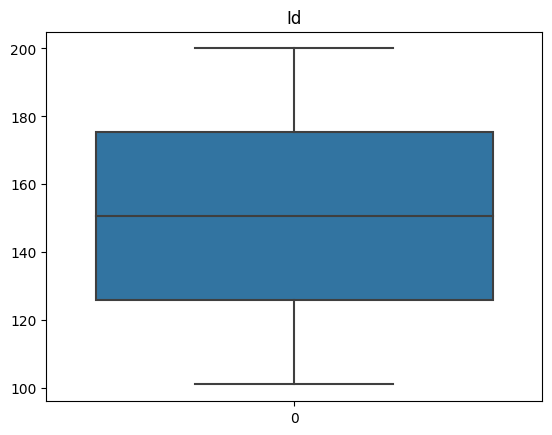

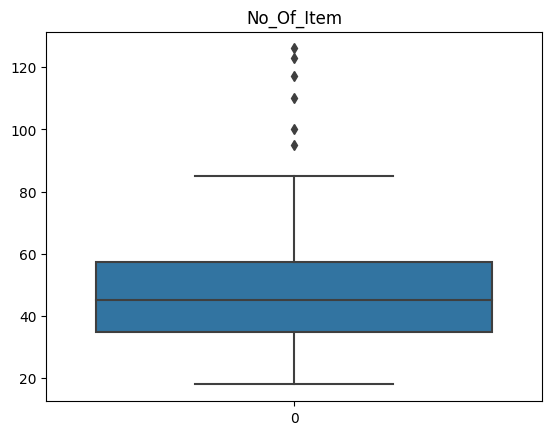

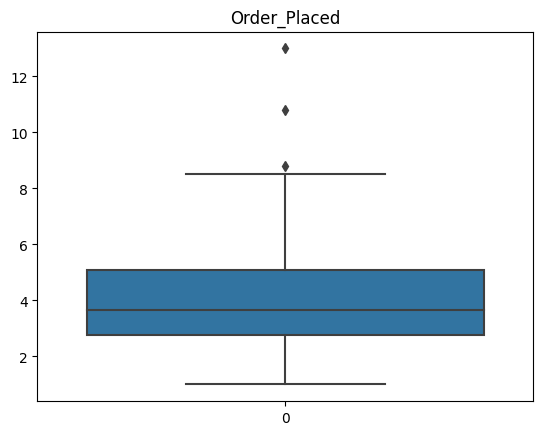

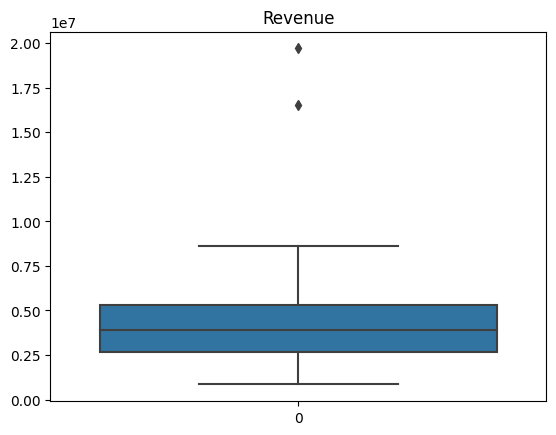

In [11]:
for i in data.columns:
  if data[i].dtypes != 'object':
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [13]:
q3 = data['No_Of_Item'].quantile(0.75)
q1 = data['No_Of_Item'].quantile(0.25)
IQR = q3-q1
data = data[(data['No_Of_Item']>=q1-1.5*IQR) & (data['No_Of_Item']<=q3+1.5*IQR)]

In [14]:
data.shape

(94, 8)

Exploratory Data Analysis (EDA)

In [17]:
data.describe(include = 'all')

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
count,94.000000,94,94,94,94,94.000000,94.000000,9.400000e+01
unique,NaN,94,2,19,5,NaN,NaN,NaN
top,NaN,HungryHowie'sPizza,Yes,Varied Menu,Bengaluru,NaN,NaN,NaN
freq,NaN,1,52,14,40,NaN,NaN,NaN
mean,151.223404,NaN,NaN,NaN,NaN,45.074468,3.747872,3.957660e+06
std,29.291694,NaN,NaN,NaN,NaN,15.940237,1.523771,1.648529e+06
min,101.000000,NaN,NaN,NaN,NaN,18.000000,1.000000,8.498700e+05
25%,127.250000,NaN,NaN,NaN,NaN,33.250000,2.600000,2.552284e+06
50%,152.500000,NaN,NaN,NaN,NaN,44.000000,3.600000,3.849046e+06
75%,176.500000,NaN,NaN,NaN,NaN,55.000000,4.800000,4.955128e+06


In [18]:
# The independent variable is continous hence regression model will be used

In [19]:
for i in data.columns:
  print(data[i].value_counts())

101    1
165    1
174    1
173    1
172    1
      ..
133    1
132    1
131    1
130    1
200    1
Name: Id, Length: 94, dtype: int64
HungryHowie'sPizza                  1
Romano'sMacaroniGrill               1
J.Alexander's                       1
UnoPizzeria&Grill                   1
Cinnabon                            1
                                   ..
Fleming'sPrimeSteakhouse&WineBar    1
TacoCabana                          1
VillageInn                          1
NinetyNineRestaurants               1
Mimi'sBistro&Bakery                 1
Name: Name, Length: 94, dtype: int64
Yes    52
No     42
Name: Franchise, dtype: int64
Varied Menu        14
Mexican            10
Pizza               9
Italian/Pizza       7
Steak               7
Family Style        7
Sandwich            7
Burger              6
Bakery Cafe         4
Seafood             4
Family Casual       3
BBQ                 3
Coffee Cafe         2
Sports Bar          2
Frozen Desserts     2
Asian/Noodle        2
Chicken  

In [22]:
for i in data.columns:
  print(i , '-', data[i].nunique())

Id - 94
Name - 94
Franchise - 2
Category - 19
City - 5
No_Of_Item - 47
Order_Placed - 49
Revenue - 94


from above data we can say that there are 94 restraunts situated in 5 metro cities providing 19 diffrent kinds of cuisine, Out of these restraunts only 52 have a Franchise.

<Axes: >

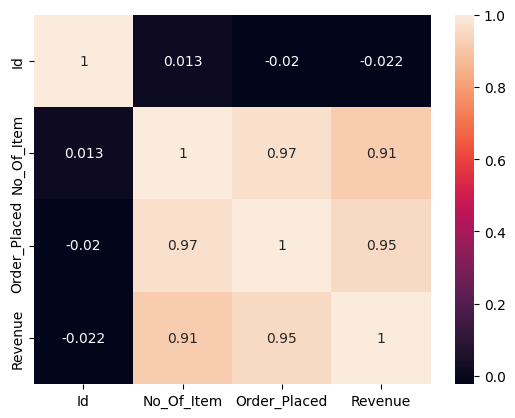

In [24]:
sns.heatmap(data.corr(),annot = True)

In [25]:
#ID and Name will not have any relation with the revenue, hence we can drop them

In [27]:
data.drop(['Id','Name'],axis = 1,inplace = True)

Feature Selection

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [29]:
ss = StandardScaler()
le = LabelEncoder()

In [30]:
for i in data.columns:
  if data[i].dtypes == 'object':
    data[i] = le.fit_transform(data[i])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     94 non-null     int64  
 1   Category      94 non-null     int64  
 2   City          94 non-null     int64  
 3   No_Of_Item    94 non-null     int64  
 4   Order_Placed  94 non-null     float64
 5   Revenue       94 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 5.1 KB


<Axes: >

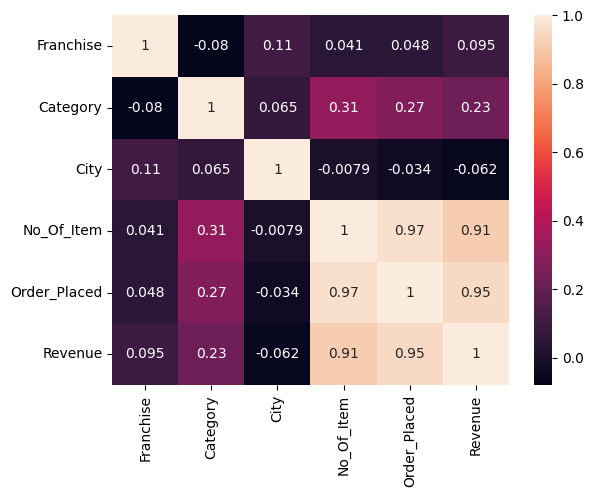

In [32]:
sns.heatmap(data.corr(),annot = True)

From above heatmap it is visible that revenue is positively correlated with no.of item amd orders placed

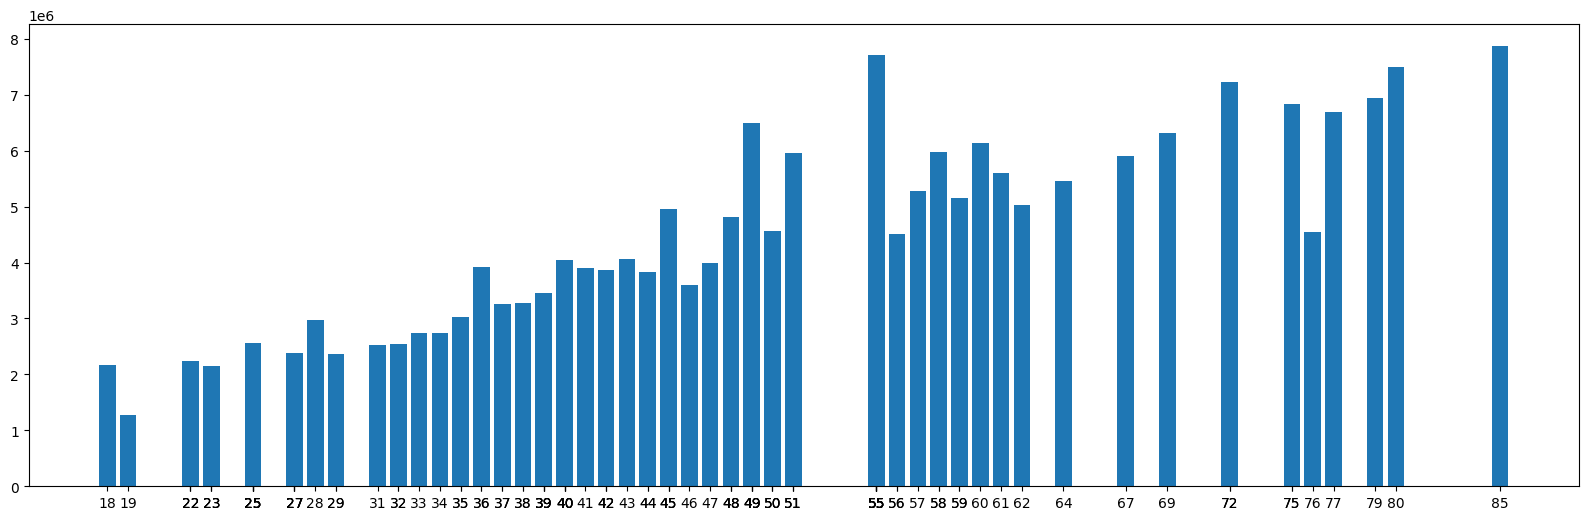

In [57]:
plt.figure(figsize = (20,6))
plt.bar(data['No_Of_Item'], data['Revenue'])
plt.xticks(data['No_Of_Item'])
plt.show()

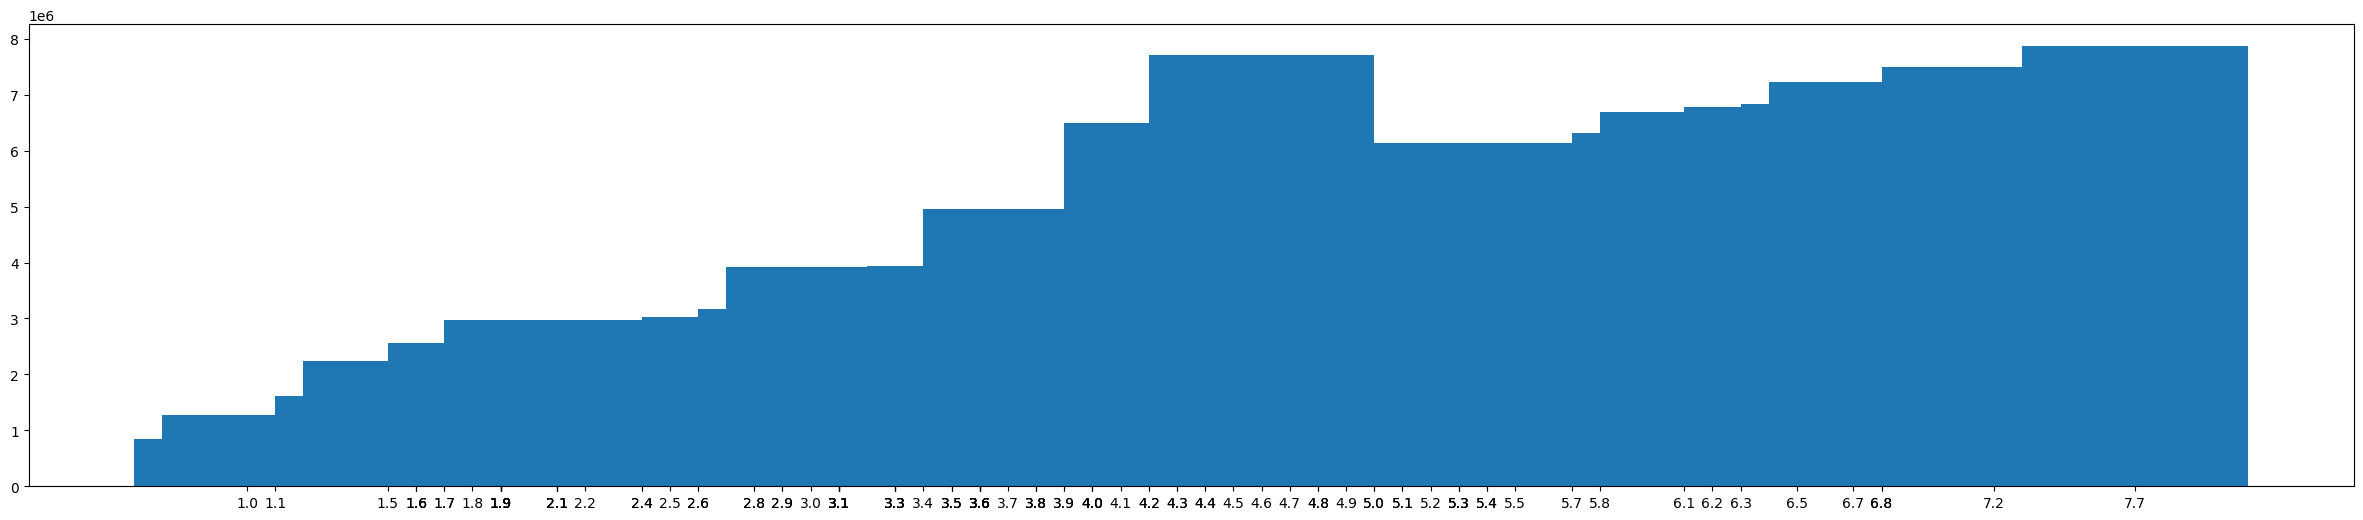

In [63]:
plt.figure(figsize = (30,6))
plt.bar(data['Order_Placed'], data['Revenue'])
plt.xticks(data['Order_Placed'])
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x = data.drop('Revenue',axis = 1)
y = data['Revenue']

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [67]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [69]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
Knn = KNeighborsRegressor()

In [70]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [71]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [72]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [73]:
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
Knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [76]:
ypred_lr = lr.predict(xtest)
ypred_dt = dt.predict(xtest)
ypred_rf = rf.predict(xtest)
ypred_xgb = xgb.predict(xtest)
ypred_Knn = Knn.predict(xtest)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
print('lr', r2_score(ytest,ypred_lr))
print('dt', r2_score(ytest,ypred_dt))
print('rf', r2_score(ytest,ypred_rf))
print('xgb', r2_score(ytest,ypred_xgb))
print('Knn', r2_score(ytest,ypred_Knn))

lr 0.9316103747061717
dt 0.588587198855782
rf 0.8989690242695482
xgb 0.7728729855002997
Knn 0.8877227569331037


In [82]:
print('lr', np.round(mean_squared_error(ytest,ypred_lr,squared = True),2))
print('dt', np.round(mean_squared_error(ytest,ypred_dt,squared = True),2))
print('rf', np.round(mean_squared_error(ytest,ypred_rf,squared = True),2))
print('xgb', np.round(mean_squared_error(ytest,ypred_xgb,squared = True),2))
print('Knn', np.round(mean_squared_error(ytest,ypred_Knn,squared = True),2))

lr 167432097055.01
dt 1007224527914.89
rf 247344945397.59
xgb 556054404043.66
Knn 274878158455.74


As per the R2 score linear regression is best suited for this problem giving accuracy of 93 percent.